Personal Finance Tracker by Amna Mahboob

Objective: Analyze and categorize personal expenses to identify spending habits.

Steps:

1.Create a dataset with columns like Date, Category (e.g., Food, Rent, Travel), and Amount.

2.Use Pandas to group expenses by category and month.

3.Calculate total, average, and percentage of spending for each category.

4.Identify the most significant spending areas.


In [ ]:
import pandas as pd
import numpy as np

Step 1: Creating dataset

-select columns = date, category, amount

-generate random values

-create dataframe

In [ ]:
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', end='2024-12-31', freq = 'D')
category = ['Food', 'Rent', 'Health Care', 'Entertainment', 'Education']

data = {
    'Date' : np.random.choice(dates, size = len(dates)),
    'Category' : np.random.choice(category, size = len(dates)),
    'Amount' : np.random.randint(100, 1000, size = len(dates))
}

df = pd.DataFrame(data)
df.head()

,Date,Category,Amount
0,2023-04-13,Food,990
1,2024-03-11,Health Care,589
2,2023-09-28,Health Care,518
3,2023-04-17,Food,789
4,2023-03-13,Education,949


Step 2 - Grouping of data

-group data by category
-group data by month

In [ ]:
by_category = df.groupby('Category')
by_month = df.groupby(df['Date'].dt.to_period('M'))

Step 3 - Calculate spending

-calculate total per category

-calculate average per category

-calculate its percentage (spending per category / spending overall)

In [ ]:
total_per_category = by_category['Amount'].sum()
avg_per_category = by_category['Amount'].mean()
percent_per_category = by_category['Amount'].sum() / df['Amount'].sum() * 100
total_spending = df['Amount'].sum()

Step 4 - Identify the Most Significant Spending Areas

-Sort the categories by total spending

-Highlight significant categories

In [ ]:
sort_total = total_per_category.sort_values(ascending = False)
sort_total

,Amount
Category,
Food,89257
Health Care,81256
Education,80943
Rent,74949
Entertainment,67479


In [ ]:
sort_percent = percent_per_category.sort_values(ascending = False)
sort_percent

,Amount
Category,
Food,22.660733
Health Care,20.629424
Education,20.549959
Rent,19.028191
Entertainment,17.131694


Step 5 - Visualize Insights

-Bar char category wise spending

-pie chart to see the category spending percent

-line plot for month wise spending

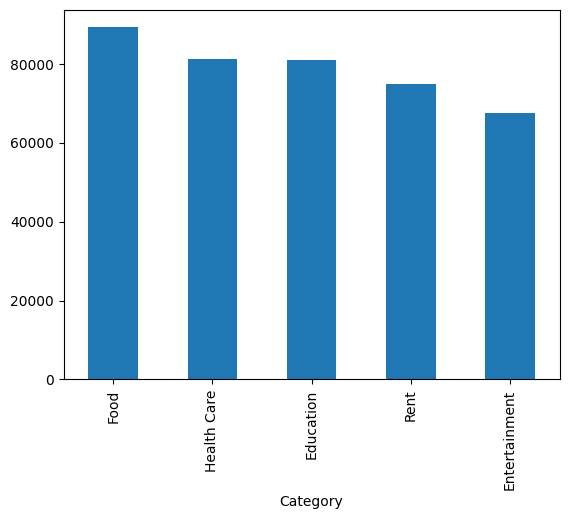

In [ ]:
bar_category = sort_total.plot(kind = 'bar')

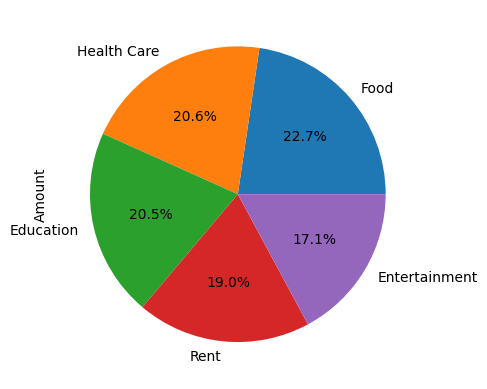

In [ ]:
pie_category = sort_percent.plot(kind = 'pie', autopct = '%1.1f%%')

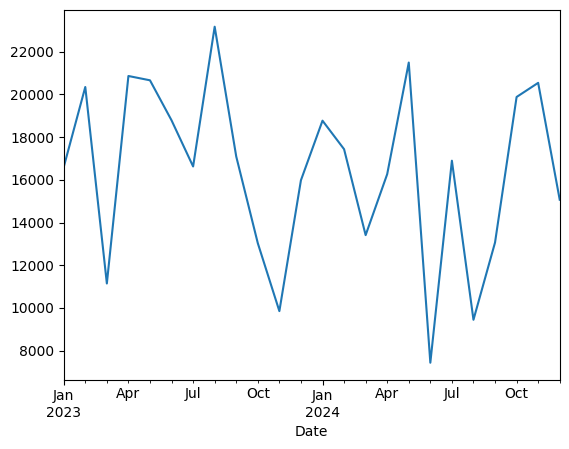

In [ ]:
line_category = by_month['Amount'].sum().plot(kind = 'line')

Step 6 - Report Summary

-Include total spending, average spending, and percentage contribution for each category

-top spending category, average monthly expense, and areas to focus on reducing expenses

In [ ]:
summary_df = pd.DataFrame({
    'Total Spending' : total_per_category,
    'Average Spending' : avg_per_category,
    'Percentage Contribution' : percent_per_category})

summary_df['Percentage Contribution'] = summary_df['Percentage Contribution'].map('{:.2f}%'.format)
print(summary_df)

               Total Spending  Average Spending Percentage Contribution
Category                                                               
Education               80943        536.046358                  20.55%
Entertainment           67479        553.106557                  17.13%
Food                    89257        564.917722                  22.66%
Health Care             81256        538.119205                  20.63%
Rent                    74949        503.013423                  19.03%


In [ ]:
high_spend_category = summary_df['Total Spending'].idxmax()

high_percent_value = summary_df.loc[ high_spend_category, 'Percentage Contribution']

insight = f"The category '{high_spend_category}' has {high_percent_value}% of total expenses."

print(insight)


The category 'Food' has 22.66%% of total expenses.


In [ ]:
summary_text = summary_df.to_string(index = False)

report = f"Personal Finance Report\n\nSummary Table:\n{summary_text}\n\nKey Insights:\n{insight}"

with open ('finance_report.txt', 'w') as file:
  file.write(report)

print("Report saved as 'finance_report.txt'. ")

Report saved as 'finance_report.txt'. 
